# Smooth slider interaction with matplotlib and bqplot

See this Project Jupyter group thread: [Smooth interaction with graphics](https://groups.google.com/forum/#!topic/jupyter/XBhFrNDC0UQ)

## Matplotlib - flickers a lot

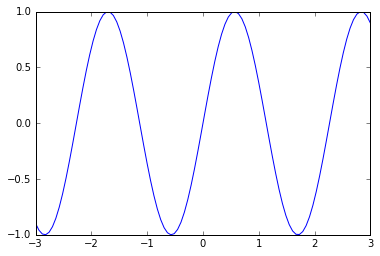

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

def myplot(a):
    xs = np.linspace(-3,3,100)
    ys = np.sin(a*xs)
    plt.plot(xs,ys)
demo = interact(myplot, a=FloatSlider(value=1, min=-3, max=3, step=0.01))

Here is Fernando Perez's approach as shared at [google group](https://groups.google.com/forum/#!topic/jupyter/XBhFrNDC0UQ). Note that it still flickers pretty badly.

> This is the matplotlib version with manual data assignment, which is probably the most efficient you can make something like this without making the code a lot uglier and harder to understand.  It's the MPL equivalent of what Sylvain did:


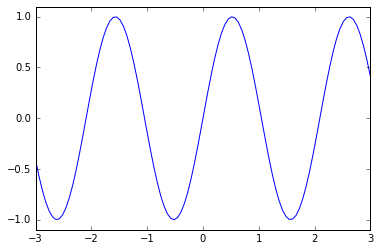

In [1]:
#### Start
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
from IPython.display import display

# setup
xs = np.linspace(-3,3,100)
fig, ax = plt.subplots()
line, = ax.plot(xs, xs)
ax.set_xlim(-3, 3)
ax.set_ylim(-1.1, 1.1)
plt.close(fig) # we'll display it manually

# Plot function only updates the data
def myplot(a):
    line.set_ydata(np.sin(a*xs))
    # we now call the display manually with the new image
    display(fig)
    
interact(myplot, a=FloatSlider(value=1.5, min=-3, max=3, step=0.01));
#### End


Sylvain Corely says

>The problem is that the rendering logic for matplotlib resides in the backend. I would recommand using the "notebook" backend for matplotlib which should improve the situation.
>
>Or you can use a plotting library for the notebook such as bqplot.

Brian Granger says

>The main thing I have found with using matplotlib with interact is 
that you have to do a bit of extra work to make sure that the overall 
frame/ticks/limits/etc are the same as you vary your parameter. 
Because each call to plt.plot is new, matplotlib has no way of knowing 
it should hold those things invariant. 

## Try bqplot

I had to install (`pip install bqplot`) and enable (jupyter nbextension enable --py --sys-prefix bqplot) it.

In [2]:
import numpy as np
import bqplot.pyplot as plt
from ipywidgets import interact, FloatSlider

fig = plt.figure()
xs = np.linspace(-3,3,100)
lines = plt.plot(xs, [])

def freq(a): 
    lines.y = np.sin(a * xs)

demo = interact(freq, a=FloatSlider(value=1, min=-3, max=3, step=0.01))
plt.ylim(-1.1,1.1)
plt.show()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Problem: get error message:

    Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
    
I ran `jupyter nbextension enable --py --sys-prefix widgetsnbextension`, but I still get the same error message.